# Решение

Импорт библиотек

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

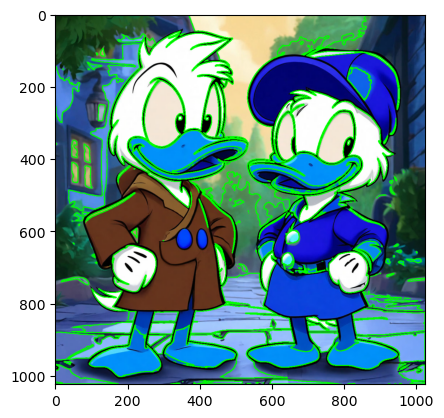

In [4]:
# 1. Загрузка изображения. Перевод в оттенки серого
image = cv2.imread('images/ducks.jpeg', cv2.IMREAD_COLOR)  # Цветное изображение
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Преобразование в градации серого

# 2.1. Пороговая фильтрация
_, binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# 2.2. Нахождение контуры изображения
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 2.3. Отрисовываем контуры
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# 2.4. Отображаем резульат
plt.imshow(output_image)
plt.show()

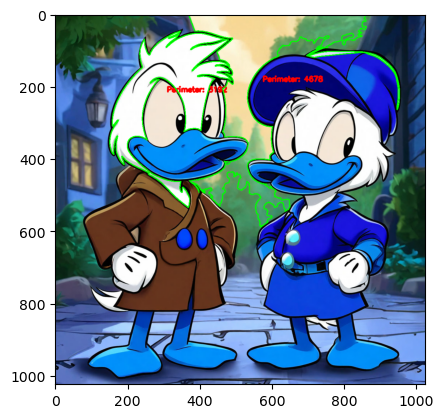

True

In [26]:
top_2_image = image.copy()
# 5. Вычисление площади и периметра, подписание на изображении

contours_dict = {cv2.arcLength(contour, closed=True):contour for contour in contours}
max_2_contours = [contours_dict[arclength] for arclength in sorted(contours_dict.keys())[-2:]]
for contour in max_2_contours:
    # Вычисление площади и периметра
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    
    # Найти центр для подписи
    M = cv2.moments(contour)
    if M["m00"] != 0:  # Чтобы избежать деления на 0
        cx = int(M["m10"] / M["m00"])  # Координаты центра
        cy = int(M["m01"] / M["m00"])
        # Подписать площадь на изображении
        cv2.putText(top_2_image, f"Perimeter: {int(perimeter)}", (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 4)

cv2.drawContours(top_2_image, max_2_contours, -1, (0, 255, 0), 2)
# 6. Отображение результата
plt.imshow(top_2_image)
plt.show()

# 7. Сохранение итогового изображения
cv2.imwrite('images/ducks_contours.jpg', output_image)